In [1]:
library(ArchR)
projEndo2<-loadArchRProject(path='/shen/shenlabstore3/neng/20200509_scATAC_sneddon/Save-ProjEndo2',force=TRUE, showLogo=FALSE)

Loading required package: ggplot2

Loading required package: SummarizedExperiment

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    unio

In [4]:
trajectoryDelta<-c("Common_Progenitor","PreAlpha-PreEpsilon","Delta")
trajectoryAlpha<-c("Common_Progenitor","PreAlpha-PreEpsilon","Alpha")
trajectoryEpsilon<-c("Common_Progenitor","PreAlpha-PreEpsilon","Epsilon")
projEndo2 <- addTrajectory(
    ArchRProj = projEndo2, 
    name = "Delta", 
    groupBy = "Clusters2",
    trajectory = trajectoryDelta, 
    embedding = "UMAP", 
    force = TRUE
)
projEndo2 <- addTrajectory(
    ArchRProj = projEndo2, 
    name = "Alpha", 
    groupBy = "Clusters2",
    trajectory = trajectoryAlpha, 
    embedding = "UMAP", 
    force = TRUE
)
projEndo2 <- addTrajectory(
    ArchRProj = projEndo2, 
    name = "Epsilon", 
    groupBy = "Clusters2",
    trajectory = trajectoryEpsilon, 
    embedding = "UMAP", 
    force = TRUE
)
projEndo2 <- addImputeWeights(projEndo2)
p <- plotTrajectory(projEndo2, trajectory = "Delta", colorBy = "cellColData", name = "Delta")
plotPDF(p, name = "SupervisedDeltaTrajectory.pdf", ArchRProj = projEndo2, addDOC = FALSE, width = 5, height = 5)

p <- plotTrajectory(projEndo2, trajectory = "Alpha", colorBy = "cellColData", name = "Alpha")
plotPDF(p, name = "SupervisedAlphaTrajectory.pdf", ArchRProj = projEndo2, addDOC = FALSE, width = 5, height = 5)

p <- plotTrajectory(projEndo2, trajectory = "Epsilon", colorBy = "cellColData", name = "Epsilon")
plotPDF(p, name = "SupervisedEpsilonTrajectory.pdf", ArchRProj = projEndo2, addDOC = FALSE, width = 5, height = 5)

In [7]:
#testGenes<-c('MAFA', 'MAFB', 'INS', 'NEUROG3', 'FOXA2', 'ASCL1', 'NKX6-1', 'SOX9', 'HES6', 'PAX6', 'GATA4', 'GATA6','PDX1', 'ISL1', 'MNX1', 'NKX2-2','PAX4','ARX','GCG')
#testGenes<-c('FEV')
#projEndo2 <- addImputeWeights(projEndo2)
#testGenes<-c('FOXP2','FOSB','JUN','ASCL1','ASCL2','SUSD2','LMX1B','PRPH')
for (gene in testGenes){
    p1 <- plotTrajectory(projEndo2, trajectory = "Beta", colorBy = "GeneScoreMatrix", name = gene, continuousSet = "horizonExtra",log2Norm = TRUE,)
    p2 <- plotTrajectory(projEndo2, trajectory = "Beta", colorBy = "GIM-CellFindR", name = gene, continuousSet = "blueYellow",log2Norm=TRUE)
    plotPDF(p1[[2]], name = paste0(gene,"_ATACBetatraj.pdf"), ArchRProj = projEndo2, addDOC = FALSE, width = 5, height = 5)
    plotPDF(p2[[2]], name = paste0(gene,"_RNABetatraj.pdf"), ArchRProj = projEndo2, addDOC = FALSE, width = 5, height = 5)

    
}

In [71]:
gene<-'FOXP2'
names<-c("Epsilon")
for (name in names ){
    p1 <- plotTrajectory(projEndo2, trajectory = name, colorBy = "GeneScoreMatrix", name = gene, continuousSet = "horizonExtra",log2Norm = TRUE,)
    p2 <- plotTrajectory(projEndo2, trajectory = name, colorBy = "GIM-CellFindR", name = gene, continuousSet = "blueYellow",log2Norm=TRUE)
    plotPDF(p1[[2]], name = paste0(gene,"_ATAC",name,"traj.pdf"), ArchRProj = projEndo2, addDOC = FALSE, width = 5, height = 5)
    plotPDF(p2[[2]], name = paste0(gene,"_RNA",name,"traj.pdf"), ArchRProj = projEndo2, addDOC = FALSE, width = 5, height = 5)
    p1[[2]]
    p2[[2]]
}


Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotTrajectory-49ac7005ed22-Date-2020-06-15_Time-20-20-28.log
If there is an issue, please report to github with logFile!

Getting Matrix Values...

2020-06-15 20:20:53 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting

Warning message:
“Removed 1617 rows containing non-finite values (stat_summary_hex).”
Plotting Trajectory

Adding Inferred Arrow Trajectory to Plot

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectory-49ac7005ed22-Date-2020-06-15_Time-20-20-28.log

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotTrajectory-49accdf1d4a-Date-2020-06-15_Time-20-21-14.log
If there is an issue, please report to github with logFile!



In [13]:
names<-c("Delta","Alpha","Epsilon")

for (traj in names){
trajGSM  <- getTrajectory(ArchRProj = projEndo2, name = traj, useMatrix = "GeneScoreMatrix", log2Norm = FALSE)
trajGIM  <- getTrajectory(ArchRProj = projEndo2, name = traj, useMatrix = "GIM-CellFindR", log2Norm = FALSE)
corGSM_GIM <- correlateTrajectories(trajGSM, trajGIM)
trajGSM2 <- trajGSM[corGSM_GIM[[1]]$name1, ]
trajGIM2 <- trajGIM[corGSM_GIM[[1]]$name2, ]

trajCombined <- trajGSM2
assay(trajCombined) <- t(apply(assay(trajGSM2), 1, scale)) + t(apply(assay(trajGIM2), 1, scale))
combinedMat <- plotTrajectoryHeatmap(trajCombined, returnMat = TRUE, varCutOff = 0)
rowOrder <- match(rownames(combinedMat), rownames(trajGSM2))

ht1 <- plotTrajectoryHeatmap(trajGSM2,  pal = paletteContinuous(set = "horizonExtra"),  varCutOff = 0, rowOrder = rowOrder)
ht2 <- plotTrajectoryHeatmap(trajGIM2,  pal = paletteContinuous(set = "solarExtra"),  varCutOff = 0, rowOrder = rowOrder)
plotPDF(ht1+ht2,type="h", name = paste0("Correlated_",traj,"trajectory.pdf"), ArchRProj = projEndo2, addDOC = FALSE, width = 7, height = 8)
}

Creating Trajectory Group Matrix..

Smoothing...

Creating Trajectory Group Matrix..

Smoothing...

ArchR logging to : ArchRLogs/ArchR-correlateTrajectories-49acac56eac-Date-2020-06-15_Time-18-56-33.log
If there is an issue, please report to github with logFile!

Found 22 Correlated Pairings!

2020-06-15 18:58:37 : 

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-49ac7989527d-Date-2020-06-15_Time-18-58-37.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-49ac7989527d-Date-2020-06-15_Time-18-58-37.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-49ac2615ddfc-Date-2020-06-15_Time-18-58-47.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-49ac2615ddfc-Date-2020-06-15_Time-18-58-47.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-49ac7b41ac

[1] "h"


Creating Trajectory Group Matrix..

Smoothing...

Creating Trajectory Group Matrix..

Smoothing...

ArchR logging to : ArchRLogs/ArchR-correlateTrajectories-49ac38e0e7a1-Date-2020-06-15_Time-18-59-42.log
If there is an issue, please report to github with logFile!

Found 32 Correlated Pairings!

2020-06-15 19:01:44 : 

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-49ac1535618e-Date-2020-06-15_Time-19-01-44.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-49ac1535618e-Date-2020-06-15_Time-19-01-44.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-49ac47d886f9-Date-2020-06-15_Time-19-01-55.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-49ac47d886f9-Date-2020-06-15_Time-19-01-55.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-49ac30146

[1] "h"


Creating Trajectory Group Matrix..

Smoothing...

Creating Trajectory Group Matrix..

Smoothing...

ArchR logging to : ArchRLogs/ArchR-correlateTrajectories-49ac3c0000-Date-2020-06-15_Time-19-02-45.log
If there is an issue, please report to github with logFile!

Found 10 Correlated Pairings!

2020-06-15 19:04:43 : 

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-49ac57bab6ce-Date-2020-06-15_Time-19-04-43.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-49ac57bab6ce-Date-2020-06-15_Time-19-04-43.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-49ac302e2fc0-Date-2020-06-15_Time-19-04-46.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-49ac302e2fc0-Date-2020-06-15_Time-19-04-46.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-49ac3aa383d

[1] "h"


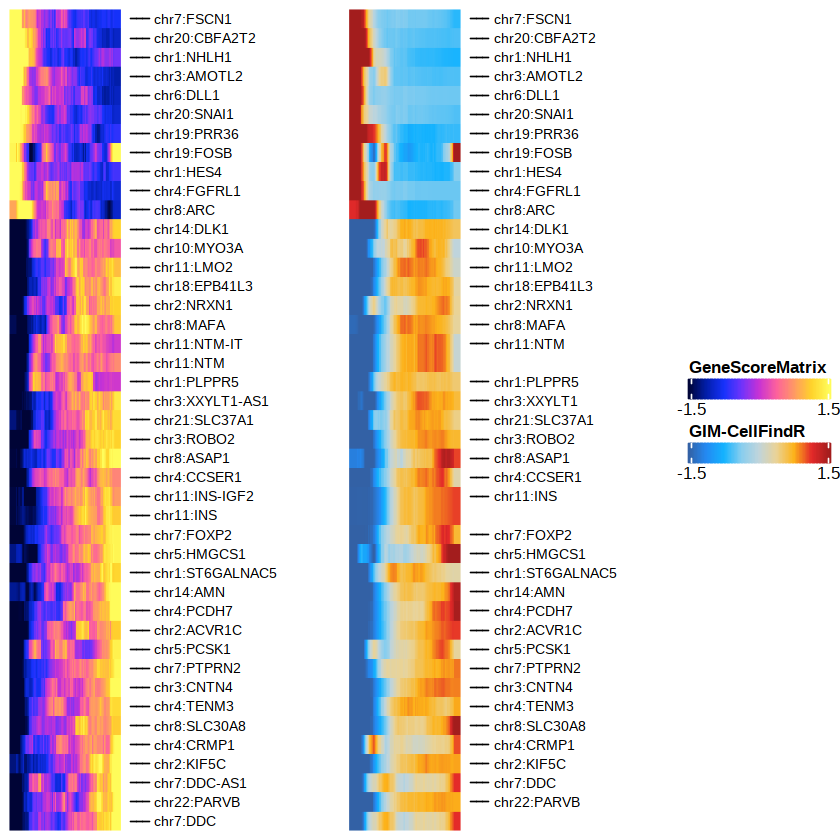

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-428f51a766b-Date-2020-05-28_Time-17-22-30.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-428f51a766b-Date-2020-05-28_Time-17-22-30.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-428f32bd6b99-Date-2020-05-28_Time-17-22-30.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-428f32bd6b99-Date-2020-05-28_Time-17-22-30.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-428f3cda18a2-Date-2020-05-28_Time-17-22-31.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-428f3cda18a2-Date-2020-05-28_Time-17-22-31.log



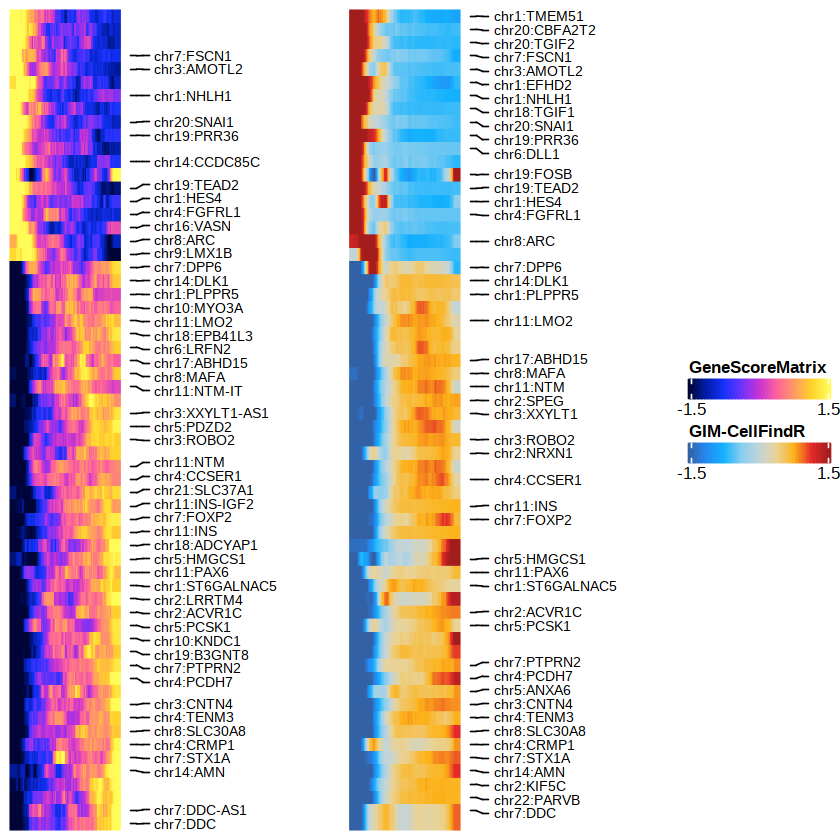

In [28]:

#plotPDF(ht1,type="h", name = paste0("Correlated_ATAC_Betatrajectory.pdf"), ArchRProj = projEndo2, addDOC = FALSE, width = 5, height = 5)
#plotPDF(ht2,type="h", name = paste0("Correlated_RNA_Betatrajectory.pdf"), ArchRProj = projEndo2, addDOC = FALSE, width = 5, height = 5)

In [39]:
plotPDF(ht1+ht2,type="h", name = paste0("Correlated_Betatrajectory.pdf"), ArchRProj = projEndo2, addDOC = FALSE, width = 7, height = 8)

Plotting ComplexHeatmap!

Plotting Other



[1] "h"


In [17]:
markersGS <- getMarkerFeatures(
    ArchRProj = projEndo2, 
    useMatrix = "GeneScoreMatrix", 
    groupBy = "Clusters2",
    bias = c("TSSEnrichment", "log10(nFrags)"),
    testMethod = "wilcoxon"
)
markerList <- getMarkers(markersGS, cutOff = "FDR <= 0.05")
#markerGenes <-  c('GAPDH','ACTB','INS','INS-IGF2','SCG5','NKX6-1',
#  'PDX1','GCG', 'IRX2', 'IRX1', 'ARX',
#  'MAFB', 'TTR','SST','PPY','GHRL',
#  'NEUROG3','FEV','SUSD2','CPA1',
#  'PTF1A', 'CPA2','REG1A','KRT19',
#  'CFTR','SOX9','SPP1','VIM',
#  'COL1A1','COL3A1','PTPRC','RAC2',
#  'SOX10','WT1',
#  'CAV1','PECAM1','EPCAM')

#markerlist

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-49ac188b814b-Date-2020-06-15_Time-19-45-13.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Double.Matrix

2020-06-15 19:45:29 : Matching Known Biases, 0.047 mins elapsed.

2020-06-15 19:45:51 : Computing Pairwise Tests (1 of 7), 0.411 mins elapsed.

2020-06-15 19:50:04 : Computing Pairwise Tests (2 of 7), 4.629 mins elapsed.

2020-06-15 19:50:24 : Computing Pairwise Tests (3 of 7), 4.969 mins elapsed.

2020-06-15 19:50:37 : Computing Pairwise Tests (4 of 7), 5.188 mins elapsed.

2020-06-15 19:50:53 : Computing Pairwise Tests (5 of 7), 5.44 mins elapsed.

2020-06-15 19:51:06 : Computing Pairwise Tests (6 of 7), 5.668 mins elapsed.

2020-06-15 19:51:19 : Computing Pairwise Tests (7 of 7), 5.888 mins elapsed.

###########
2020-06-15 19:51:33 : Completed Pairwise Tests, 6.115 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-49ac188b814b-Date-2020-06-15_Time-1

In [18]:
markerlist<-c(markerList$Beta$name,
              markerList$'FEV-High'$name,
              markerList$Common_Progenitor$name,
              markerList$Alpha$name,
              markerList$Delta$name,
              markerList$Epsilon$name,
              markerList$'PreAlpha-PreEpsilon'$name)

In [54]:
index<-grepl('MIR',rowData(markersGS)$name)
markersGS_noMIR<-markersGS[!index]

In [58]:
heatmapGS <- markerHeatmap(
  seMarker = markersGS_noMIR, 
  cutOff = "FDR <= 0.01 & Log2FC >= 1.25", 
  labelMarkers = markerlist,
  transpose = TRUE
)
#markerList <- getMarkers(markersGS, cutOff = "FDR <= 0.01 & Log2FC >= 1.25")
ComplexHeatmap::draw(heatmapGS, heatmap_legend_side = "bot", annotation_legend_side = "bot")
plotPDF(heatmapGS, name = "GeneScores-Marker-Heatmap_noMIR", width = 20, height = 8, ArchRProj = projEndo2, addDOC = FALSE)

Warning message:
“'markerHeatmap' is deprecated.
Use 'plotMarkerHeatmap' instead.
See help("Deprecated")”
ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-49ac201354a8-Date-2020-06-15_Time-20-04-07.log
If there is an issue, please report to github with logFile!

Printing Top Marker Genes:

Alpha:

	OR51A7, OR51A4, HRASLS2, FGF23, KLRC3, KLRC2, COL4A2-AS1, LOC101929586, PRC1-AS1, GCG, LOC101929532, FAP, SH3BP5-AS1, IL17A, SCARNA23, FMR1NB, TNFRSF18, HES3, LINC01654, LOC102723661

Beta:

	LINC01676, SPRR2A, INS, KRTAP5-8, SNORD114-18, SNORD114-20, SNORD114-22, SNORD114-24, SNORD114-25, SNORD114-31, TRPV1, IGLON5, TRPM2-AS, XXYLT1-AS1, DCAF4L1, BTNL3, OR1N2, TNFRSF18, HES3, LINC01654

Common_Progenitor:

	SLC17A7, SEC22A, ELFN1, TNFRSF18, HES3, LINC01654, LOC102723661, LINC01676, LINC00622, SPRR2A, C10orf113, ANK3, INS, OR51A7, OR51A4, LOC100506258, OR9G1, HRASLS2, MYEOV, KRTAP5-8

Delta:

	LOC102723661, C10orf113, OR8G5, LINC00562, SNORD113-1, MYL1, CPB1, SST, TAAR1, CBLL2, TNFRSF18,

In [62]:
projEndo2$Clusters2

[1] "Beta"                "Delta"               "Beta"               
   [4] "Delta"               "Beta"                "Beta"               
   [7] "Beta"                "Beta"                "Beta"               
  [10] "Alpha"               "Beta"                "Delta"              
  [13] "Beta"                "Common_Progenitor"   "Beta"               
  [16] "Beta"                "Epsilon"             "Beta"               
  [19] "Beta"                "Alpha"               "Beta"               
  [22] "Beta"                "Alpha"               "Beta"               
  [25] "Alpha"               "Delta"               "Beta"               
  [28] "Beta"                "Beta"                "Delta"              
  [31] "Beta"                "Beta"                "Beta"               
  [34] "Delta"               "Beta"                "Delta"              
  [37] "Delta"               "PreAlpha-PreEpsilon" "Alpha"              
  [40] "Alpha"               "Delta"               "PreAlpha-PreEpsilon"
  [43] "PreAlpha-PreEpsilon" "Beta"                "Beta"               
  [46] "Beta"                "Alpha"               "Beta"               
  [49] "FEV-High"            "Beta"                "Beta"               
  [52] "Beta"                "Beta"                "Beta"               
  [55] "Common_Progenitor"   "Beta"                "Beta"               
  [58] "Beta"                "Alpha"               "Beta"               
  [61] "Beta"                "Delta"               "Beta"               
  [64] "Beta"                "Beta"                "Beta"               
  [67] "Delta"               "Beta"                "Epsilon"            
  [70] "Alpha"               "Epsilon"             "Beta"               
  [73] "Alpha"               "FEV-High"            "Beta"               
  [76] "Beta"                "FEV-High"            "Beta"               
  [79] "Beta"                "Alpha"               "Alpha"              
  [82] "Beta"                "Delta"               "Epsilon"            
  [85] "Beta"                "Beta"                "Alpha"              
  [88] "Beta"                "Beta"                "Delta"              
  [91] "Alpha"               "Delta"               "Beta"               
  [94] "Alpha"               "Beta"                "Alpha"              
  [97] "Beta"                "Beta"                "Beta"               
 [100] "Beta"                "Delta"               "Beta"               
 [103] "Beta"                "Beta"                "Beta"               
 [106] "Beta"                "Common_Progenitor"   "Beta"               
 [109] "Common_Progenitor"   "Alpha"               "Beta"               
 [112] "Alpha"               "PreAlpha-PreEpsilon" "PreAlpha-PreEpsilon"
 [115] "Beta"                "Alpha"               "Beta"               
 [118] "Beta"                "Delta"               "Delta"              
 [121] "Beta"                "Beta"                "Beta"               
 [124] "Delta"               "Beta"                "Beta"               
 [127] "Epsilon"             "Beta"                "Alpha"              
 [130] "Beta"                "Delta"               "Beta"               
 [133] "Alpha"               "Beta"                "Alpha"              
 [136] "Beta"                "Beta"                "Beta"               
 [139] "Beta"                "Delta"               "Delta"              
 [142] "Beta"                "Beta"                "Alpha"              
 [145] "Beta"                "Delta"               "Beta"               
 [148] "Beta"                "Beta"                "Beta"               
 [151] "Beta"                "Beta"                "Beta"               
 [154] "Beta"                "Beta"                "Beta"               
 [157] "Beta"                "Beta"                "Beta"               
 [160] "Beta"                "Beta"                "Beta"               
 [163] "Alpha"               "Delta"               "Epsilon" 

In [46]:
indices<-which(rowData(markersGSGIM)$name %in% unlist(markerList)$name)

In [71]:
unlist(markerListGIM)$name

[1] "IRX2"            "IRX1"            "FABP5"           "C5orf38"        
   [5] "GC"              "PDK4"            "ESRRG"           "GLS"            
   [9] "DRAIC"           "CHGA"            "ADH6"            "GCG"            
  [13] "TMEM236"         "SLC6A4"          "HIGD1A"          "C15orf48"       
  [17] "TPD52L1"         "ALDH1A1"         "BAIAP2L2"        "DPP4"           
  [21] "FAP"             "PYY"             "RPS6KA3"         "LDB2"           
  [25] "BTBD11"          "HSD11B1L"        "PDK3"            "GPX3"           
  [29] "SERPINE2"        "IL5RA"           "STK32B"          "UNC93B1"        
  [33] "RNF150"          "ANKRD18A"        "POU6F2"          "KCNK16"         
  [37] "VEGFC"           "INSC"            "CD82"            "SEZ6L"          
  [41] "VSTM2A"          "CKMT1A"          "EDN3"            "CDH23"          
  [45] "FKBP11"          "KCNMB2"          "ZNF467"          "CDHR5"          
  [49] "OSBPL1A"         "FAM166B"         "S100B"           "USP2-AS1"       
  [53] "SMCO4"           "PLK2"            "CSGALNACT1"      "GRIN3A"         
  [57] "IGSF1"           "C2CD4A"          "IFI27L2"         "TMOD1"          
  [61] "GALNTL6"         "IL17A"           "SERPIND1"        "PXK"            
  [65] "HLA-DRB1"        "SYNDIG1L"        "UBE2Q2L"         "SERPINI1"       
  [69] "TDRD9"           "NBL1"            "PPY"             "ENDOD1"         
  [73] "APOBEC3D"        "FBN1"            "C1orf158"        "FGFBP3"         
  [77] "ANKRD18B"        "ZHX1-C8orf76"    "KLRC2"           "KIF23"          
  [81] "NUPR2"           "MSANTD1"         "GRIA3"           "C1orf21"        
  [85] "TTC30A"          "IL6R"            "MAMLD1"          "EPB41L4B"       
  [89] "TMEM56"          "C2CD4B"          "NT5E"            "HIST1H3H"       
  [93] "MGAT4C"          "CRYBA2"          "CD36"            "DCC"            
  [97] "COTL1"           "SPOCK3"          "HS3ST5"          "ERICH3"         
 [101] "IGFBP6"          "MT1X"            "EPS8L3"          "GCNT3"          
 [105] "CLCN2"           "LBH"             "TPPP3"           "KBTBD11"        
 [109] "DCLK1"           "GDA"             "HIST1H2BK"       "KRBOX1"         
 [113] "CTSB"            "KBTBD11-OT1"     "PQLC2L"          "RAB20"          
 [117] "ACKR2"           "SLC4A10"         "C2"              "ARX"            
 [121] "SELENBP1"        "APOC3"           "MORF4L2-AS1"     "RELL2"          
 [125] "NPB"             "FAM209B"         "GPC5-AS1"        "NAGS"           
 [129] "ZAP70"           "C6orf163"        "ZNF341"          "LMO1"           
 [133] "THBS4"           "TTR"             "APOLD1"          "TRIM25"         
 [137] "DHRS2"           "PIP5K1B"         "PRSS50"          "KCNK1"          
 [141] "STC2"            "PTPRT"           "RNF32"           "KCNC4"          
 [145] "IQGAP2"          "KIAA1549L"       "DNAH9"           "ANK2"           
 [149] "FRMPD3"          "PTPRD"           "SNED1"           "CLIP4"          
 [153] "LRRC4B"          "GPR37"           "STAT4"           "ANO9"           
 [157] "FXYD3"           "ABCB10"          "NMB"             "GALNT13"        
 [161] "PPP1R32"         "GUCA2A"          "SYNJ2BP-COX16"   "RILP"           
 [165] "FAM201A"         "ACTL10"          "CD274"           "PDZRN4"         
 [169] "TNFRSF25"        "FPGS"            "EYA1"            "LRRTM2"         
 [173] "CNIH3"           "PPARGC1B"        "TTLL10"          "RCN3"           
 [177] "HMGN5"           "DAB1"            "GPHA2"           "AQP10"          
 [181] "CREG2"           "RAB3IL1"         "VMAC"            "LINC01431"      
 [185] "CPNE4"           "MFAP3L"          "SIRPA"           "NEBL-AS1"       
 [189] "LPAR1"           "FAIM2"           "SLC35F4"         "PLIN3"          
 [193] "SEMA3E"          "CFAP53"          "GPR176"          "LOXL4"          
 [197] "PDE1B"           "FXYD5"           "GUCA2B"          "FAM111B"        
 [201] "VIPR1"           "GLOD5"           "NEURL3"  

In [68]:
markerListGIM<-getMarkers(markersGSGIM, cutOff = "FDR <= 0.01 & Log2FC >= 1.25")

In [89]:
rownames(markerListGIM)

NULL

Warning message:
“'markerHeatmap' is deprecated.
Use 'plotMarkerHeatmap' instead.
See help("Deprecated")”
ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-512f4ba3ef99-Date-2020-05-27_Time-11-50-33.log
If there is an issue, please report to github with logFile!

Identified 4436 markers!

Adding Annotations..

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-512f4ba3ef99-Date-2020-05-27_Time-11-50-33.log



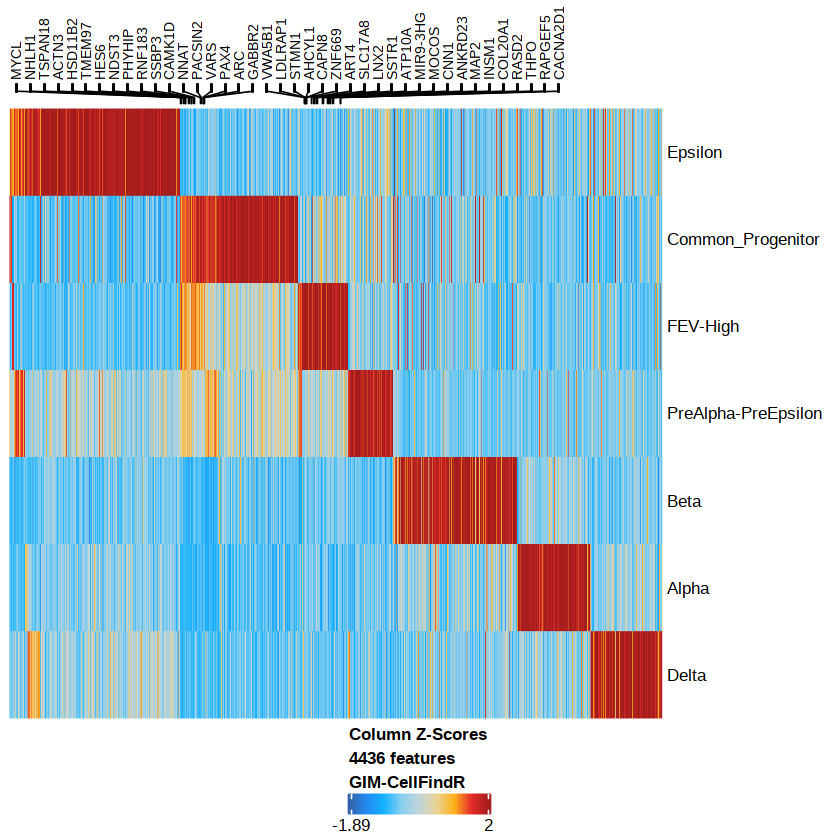

In [85]:
heatmapGSGIM <- markerHeatmap(
  seMarker = markersGSGIM, 
  cutOff = "FDR <= 0.01 & Log2FC >= 1.25", 
  labelMarkers = markerListGIM$FEV$name[1:40],
  transpose = TRUE
)
ComplexHeatmap::draw(heatmapGSGIM, heatmap_legend_side = "bot", annotation_legend_side = "bot")

In [61]:

p1 <- plotEmbedding(projEndo2, colorBy = "cellColData", name = "Clusters2", size=1.5)

plotPDF(p1, name = "IterativeLSI-ENDO_UMAP.pdf", ArchRProj = projEndo2, addDOC = FALSE, width = 5, height = 5)


ArchR logging to : ArchRLogs/ArchR-plotEmbedding-512f5e27929e-Date-2020-05-27_Time-11-30-44.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-512f5e27929e-Date-2020-05-27_Time-11-30-44.log

Plotting Ggplot!



In [65]:
p <- plotTrajectory(projEndo2, trajectory = "Beta", colorBy = "cellColData", name = "Beta",size=5)
#plotPDF(p, name = "SupervisedBetaTrajectory.pdf", ArchRProj = projEndo2, addDOC = FALSE, width = 5, height = 5)

ArchR logging to : ArchRLogs/ArchR-plotTrajectory-512f7a01b216-Date-2020-05-27_Time-11-36-06.log
If there is an issue, please report to github with logFile!

Plotting

Warning message:
“Removed 1087 rows containing non-finite values (stat_summary_hex).”
Plotting Trajectory

Adding Inferred Arrow Trajectory to Plot

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectory-512f7a01b216-Date-2020-05-27_Time-11-36-06.log



Warning message:
“Removed 1087 rows containing non-finite values (stat_summary_hex).”


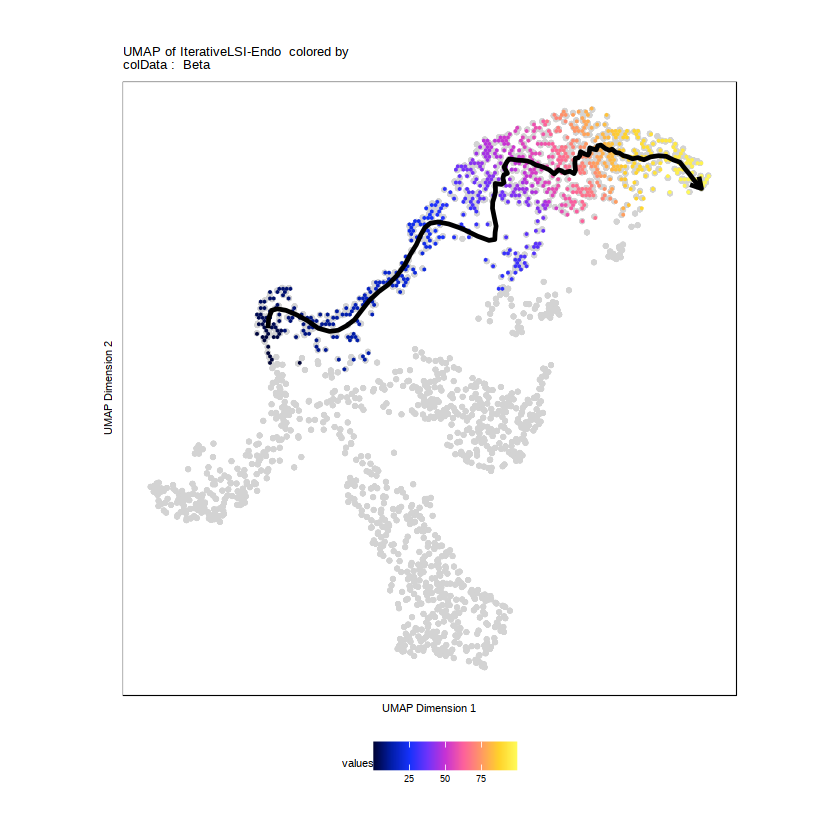

In [66]:
p[[1]]

In [92]:
projEndo2 <- addMotifAnnotations(ArchRProj = projEndo2, motifSet = "cisbp", name = "Motif")

ArchR logging to : ArchRLogs/ArchR-addMotifAnnotations-512f6a6725e-Date-2020-05-27_Time-11-57-34.log
If there is an issue, please report to github with logFile!

2020-05-27 11:57:35 : Gettting Motif Set, Species : Homo sapiens, 0.008 mins elapsed.

Using version 2 motifs!

2020-05-27 11:57:41 : Finding Motif Positions with motifmatchr!, 0.114 mins elapsed.

2020-05-27 11:58:00 : Creating Motif Overlap Matrix, 0.427 mins elapsed.

2020-05-27 11:58:00 : Finished Getting Motif Info!, 0.428 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addMotifAnnotations-512f6a6725e-Date-2020-05-27_Time-11-57-34.log



In [93]:
markersPeaks <- getMarkerFeatures(
    ArchRProj = projEndo2, 
    useMatrix = "PeakMatrix", 
    groupBy = "Clusters2",
  bias = c("TSSEnrichment", "log10(nFrags)"),
  testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-512f4855b91c-Date-2020-05-27_Time-12-01-25.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Integer.Matrix

2020-05-27 12:01:26 : Matching Known Biases, 0.005 mins elapsed.

2020-05-27 12:01:28 : Computing Pairwise Tests (1 of 7), 0.037 mins elapsed.

2020-05-27 12:02:07 : Computing Pairwise Tests (2 of 7), 0.692 mins elapsed.

2020-05-27 12:02:51 : Computing Pairwise Tests (3 of 7), 1.417 mins elapsed.

2020-05-27 12:03:23 : Computing Pairwise Tests (4 of 7), 1.95 mins elapsed.

2020-05-27 12:03:56 : Computing Pairwise Tests (5 of 7), 2.495 mins elapsed.

2020-05-27 12:04:19 : Computing Pairwise Tests (6 of 7), 2.883 mins elapsed.

2020-05-27 12:04:44 : Computing Pairwise Tests (7 of 7), 3.297 mins elapsed.

###########
2020-05-27 12:05:08 : Completed Pairwise Tests, 3.694 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-512f4855b91c-Date-2020-05-27_Time-

In [94]:
markerList <- getMarkers(markersPeaks, cutOff = "FDR <= 0.01 & Log2FC >= 1")
markerList


List of length 7
names(7): Alpha Beta Common_Progenitor Delta Epsilon FEV-High PreAlpha-PreEpsilon

In [99]:
heatmapPeaks <- markerHeatmap(
  seMarker = markersPeaks, 
  cutOff = "FDR <= 0.1 & Log2FC >= 0.5",
  transpose = TRUE
)

Warning message:
“'markerHeatmap' is deprecated.
Use 'plotMarkerHeatmap' instead.
See help("Deprecated")”
ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-512f5027b497-Date-2020-05-27_Time-12-07-32.log
If there is an issue, please report to github with logFile!

Identified 35415 markers!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-512f5027b497-Date-2020-05-27_Time-12-07-32.log



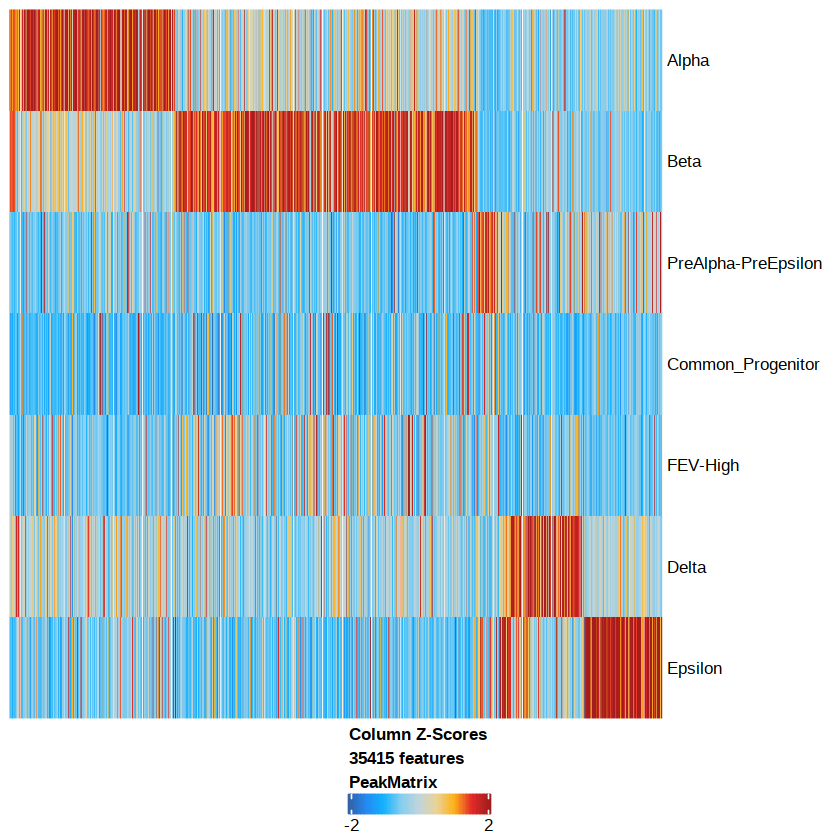

In [100]:
draw(heatmapPeaks, heatmap_legend_side = "bot", annotation_legend_side = "bot")

In [101]:
motifsUp <- peakAnnoEnrichment(
    seMarker = markerTest,
    ArchRProj = projEndo2,
    peakAnnotation = "Motif",
    cutOff = "FDR <= 0.1 & Log2FC >= 0.5"
  )

ERROR: Error in is(input, "SummarizedExperiment"): object 'markerTest' not found


In [103]:
markerTest <- getMarkerFeatures(
  ArchRProj = projEndo2, 
  useMatrix = "PeakMatrix",
  groupBy = "Clusters2",
  testMethod = "wilcoxon",
  bias = c("TSSEnrichment", "log10(nFrags)"),
  useGroups = "FEV-High",
  bgdGroups = "Common_Progenitor"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-512f1f68cda5-Date-2020-05-27_Time-12-20-17.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Integer.Matrix

2020-05-27 12:20:18 : Matching Known Biases, 0.004 mins elapsed.

Found less than 100 cells for background matching, Lowering k to 71

2020-05-27 12:20:18 : 

2020-05-27 12:20:18 : Computing Pairwise Tests (1 of 1), 0.012 mins elapsed.

###########
2020-05-27 12:20:41 : Completed Pairwise Tests, 0.399 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-512f1f68cda5-Date-2020-05-27_Time-12-20-17.log



Warning message:
“'markerPlot' is deprecated.
Use 'plotMarkers' instead.
See help("Deprecated")”
Warning message:
“Removed 80 rows containing missing values (geom_point_rast).”


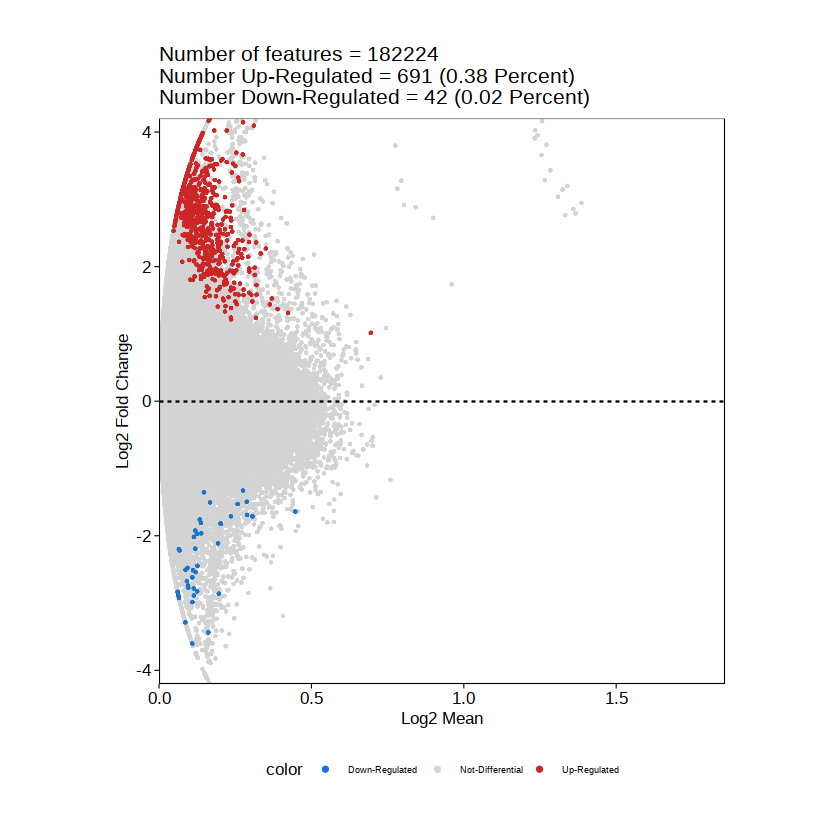

In [105]:
pma <- markerPlot(seMarker = markerTest, name = "FEV-High", cutOff = "FDR <= 0.1 & abs(Log2FC) >= 1", plotAs = "MA")
pma

In [107]:
motifsUp <- peakAnnoEnrichment(
    seMarker = markerTest,
    ArchRProj = projEndo2,
    peakAnnotation = "Motif",
    cutOff = "FDR <= 0.1 & Log2FC >= 0.5"
  )

ArchR logging to : ArchRLogs/ArchR-peakAnnoEnrichment-512f2e28a93-Date-2020-05-27_Time-12-21-49.log
If there is an issue, please report to github with logFile!



ERROR: Error in .SummarizedExperiment.charbound(i, rownames(x), fmt): <RangedSummarizedExperiment>[i,] index out of bounds: chr1826580827080_ chr1827280827780_ ... chrX155881000155881500_ chrX155881964155882464_


[1] "1"     "2"     "3"     "4"     "5"     "6"     "7"     "8"     "9"    
   [10] "10"    "11"    "12"    "13"    "14"    "15"    "16"    "17"    "18"   
   [19] "19"    "20"    "21"    "22"    "23"    "24"    "25"    "26"    "27"   
   [28] "28"    "29"    "30"    "31"    "32"    "33"    "34"    "35"    "36"   
   [37] "37"    "38"    "39"    "40"    "41"    "42"    "43"    "44"    "45"   
   [46] "46"    "47"    "48"    "49"    "50"    "51"    "52"    "53"    "54"   
   [55] "55"    "56"    "57"    "58"    "59"    "60"    "61"    "62"    "63"   
   [64] "64"    "65"    "66"    "67"    "68"    "69"    "70"    "71"    "72"   
   [73] "73"    "74"    "75"    "76"    "77"    "78"    "79"    "80"    "81"   
   [82] "82"    "83"    "84"    "85"    "86"    "87"    "88"    "89"    "90"   
   [91] "91"    "92"    "93"    "94"    "95"    "96"    "97"    "98"    "99"   
  [100] "100"   "101"   "102"   "103"   "104"   "105"   "106"   "107"   "108"  
  [109] "109"   "110"   "111"   "112"   "113"   "114"   "115"   "116"   "117"  
  [118] "118"   "119"   "120"   "121"   "122"   "123"   "124"   "125"   "126"  
  [127] "127"   "128"   "129"   "130"   "131"   "132"   "133"   "134"   "135"  
  [136] "136"   "137"   "138"   "139"   "140"   "141"   "142"   "143"   "144"  
  [145] "145"   "146"   "147"   "148"   "149"   "150"   "151"   "152"   "153"  
  [154] "154"   "155"   "156"   "157"   "158"   "159"   "160"   "161"   "162"  
  [163] "163"   "164"   "165"   "166"   "167"   "168"   "169"   "170"   "171"  
  [172] "172"   "173"   "174"   "175"   "176"   "177"   "178"   "179"   "180"  
  [181] "181"   "182"   "183"   "184"   "185"   "186"   "187"   "188"   "189"  
  [190] "190"   "191"   "192"   "193"   "194"   "195"   "196"   "197"   "198"  
  [199] "199"   "200"   "201"   "202"   "203"   "204"   "205"   "206"   "207"  
  [208] "208"   "209"   "210"   "211"   "212"   "213"   "214"   "215"   "216"  
  [217] "217"   "218"   "219"   "220"   "221"   "222"   "223"   "224"   "225"  
  [226] "226"   "227"   "228"   "229"   "230"   "231"   "232"   "233"   "234"  
  [235] "235"   "236"   "237"   "238"   "239"   "240"   "241"   "242"   "243"  
  [244] "244"   "245"   "246"   "247"   "248"   "249"   "250"   "251"   "252"  
  [253] "253"   "254"   "255"   "256"   "257"   "258"   "259"   "260"   "261"  
  [262] "262"   "263"   "264"   "265"   "266"   "267"   "268"   "269"   "270"  
  [271] "271"   "272"   "273"   "274"   "275"   "276"   "277"   "278"   "279"  
  [280] "280"   "281"   "282"   "283"   "284"   "285"   "286"   "287"   "288"  
  [289] "289"   "290"   "291"   "292"   "293"   "294"   "295"   "296"   "297"  
  [298] "298"   "299"   "300"   "301"   "302"   "303"   "304"   "305"   "306"  
  [307] "307"   "308"   "309"   "310"   "311"   "312"   "313"   "314"   "315"  
  [316] "316"   "317"   "318"   "319"   "320"   "321"   "322"   "323"   "324"  
  [325] "325"   "326"   "327"   "328"   "329"   "330"   "331"   "332"   "333"  
  [334] "334"   "335"   "336"   "337"   "338"   "339"   "340"   "341"   "342"  
  [343] "343"   "344"   "345"   "346"   "347"   "348"   "349"   "350"   "351"  
  [352] "352"   "353"   "354"   "355"   "356"   "357"   "358"   "359"   "360"  
  [361] "361"   "362"   "363"   "364"   "365"   "366"   "367"   "368"   "369"  
  [370] "370"   "371"   "372"   "373"   "374"   "375"   "376"   "377"   "378"  
  [379] "379"   "380"   "381"   "382"   "383"   "384"   "385"   "386"   "387"  
  [388] "388"   "389"   "390"   "391"   "392"   "393"   "394"   "395"   "396"  
  [397] "397"   "398"   "399"   "400"   "401"   "402"   "403"   "404"   "405"  
  [406] "406"   "407"   "408"   "409"   "410"   "411"   "412"   "413"   "414"  
  [415] "415"   "416"   "417"   "418"   "419"   "420"   "421"   "422"   "423"  
  [424] "424"   "425"   "426"   "427"   "428"   "429"   "430"   "431"   "432"  
  [433] "433"   "434"   "435"   "436"   "437"   "438"   "439"   "440"   "441"  
  [442] "442"   "443"   "444"   "445"   "446"   "447"   "448"   "449"   "450"  
  [4

In [24]:
x<-plotTrajectoryHeatmap(trajGSM2,  pal = paletteContinuous(set = "horizonExtra"),  varCutOff = 0, rowOrder = rowOrder,useSeqnames=c('chr1:HES4'))

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-428f2b668dee-Date-2020-05-28_Time-17-19-39.log
If there is an issue, please report to github with logFile!

No features left in seTrajectory, please check input!



ERROR: Error: 



In [25]:
seqnames(trajGSM2)

ERROR: Error in (function (classes, fdef, mtable) : unable to find an inherited method for function ‘seqnames’ for signature ‘"SummarizedExperiment"’


In [82]:
length(projEndo2$Clusters2)
projEndo2$Clusters2

[1] 1934

[1] "Beta"                "Delta"               "Beta"               
   [4] "Delta"               "Beta"                "Beta"               
   [7] "Beta"                "Beta"                "Beta"               
  [10] "Alpha"               "Beta"                "Delta"              
  [13] "Beta"                "Common_Progenitor"   "Beta"               
  [16] "Beta"                "Epsilon"             "Beta"               
  [19] "Beta"                "Alpha"               "Beta"               
  [22] "Beta"                "Alpha"               "Beta"               
  [25] "Alpha"               "Delta"               "Beta"               
  [28] "Beta"                "Beta"                "Delta"              
  [31] "Beta"                "Beta"                "Beta"               
  [34] "Delta"               "Beta"                "Delta"              
  [37] "Delta"               "PreAlpha-PreEpsilon" "Alpha"              
  [40] "Alpha"               "Delta"               "PreAlpha-PreEpsilon"
  [43] "PreAlpha-PreEpsilon" "Beta"                "Beta"               
  [46] "Beta"                "Alpha"               "Beta"               
  [49] "FEV-High"            "Beta"                "Beta"               
  [52] "Beta"                "Beta"                "Beta"               
  [55] "Common_Progenitor"   "Beta"                "Beta"               
  [58] "Beta"                "Alpha"               "Beta"               
  [61] "Beta"                "Delta"               "Beta"               
  [64] "Beta"                "Beta"                "Beta"               
  [67] "Delta"               "Beta"                "Epsilon"            
  [70] "Alpha"               "Epsilon"             "Beta"               
  [73] "Alpha"               "FEV-High"            "Beta"               
  [76] "Beta"                "FEV-High"            "Beta"               
  [79] "Beta"                "Alpha"               "Alpha"              
  [82] "Beta"                "Delta"               "Epsilon"            
  [85] "Beta"                "Beta"                "Alpha"              
  [88] "Beta"                "Beta"                "Delta"              
  [91] "Alpha"               "Delta"               "Beta"               
  [94] "Alpha"               "Beta"                "Alpha"              
  [97] "Beta"                "Beta"                "Beta"               
 [100] "Beta"                "Delta"               "Beta"               
 [103] "Beta"                "Beta"                "Beta"               
 [106] "Beta"                "Common_Progenitor"   "Beta"               
 [109] "Common_Progenitor"   "Alpha"               "Beta"               
 [112] "Alpha"               "PreAlpha-PreEpsilon" "PreAlpha-PreEpsilon"
 [115] "Beta"                "Alpha"               "Beta"               
 [118] "Beta"                "Delta"               "Delta"              
 [121] "Beta"                "Beta"                "Beta"               
 [124] "Delta"               "Beta"                "Beta"               
 [127] "Epsilon"             "Beta"                "Alpha"              
 [130] "Beta"                "Delta"               "Beta"               
 [133] "Alpha"               "Beta"                "Alpha"              
 [136] "Beta"                "Beta"                "Beta"               
 [139] "Beta"                "Delta"               "Delta"              
 [142] "Beta"                "Beta"                "Alpha"              
 [145] "Beta"                "Delta"               "Beta"               
 [148] "Beta"                "Beta"                "Beta"               
 [151] "Beta"                "Beta"                "Beta"               
 [154] "Beta"                "Beta"                "Beta"               
 [157] "Beta"                "Beta"                "Beta"               
 [160] "Beta"                "Beta"                "Beta"               
 [163] "Alpha"               "Delta"               "Epsilon" 

In [35]:
markerGenes<-c("INS", "GCG", "GHRL", "SST", "NEUROG3", "FEV", "SUSD2", "LMX1B", "PRPH")

In [54]:
p <- plotEmbedding(
    ArchRProj = projEndo2, 
    colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = "UMAP",
    size=1.5,
    imputeWeights = getImputeWeights(projEndo2),
    plotAs='points'
)

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-76081c7605b7-Date-2020-06-08_Time-13-13-16.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2020-06-08 13:13:17 : 

1 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 
9 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-76081c7605b7-Date-2020-06-08_Time-13-13-16.log



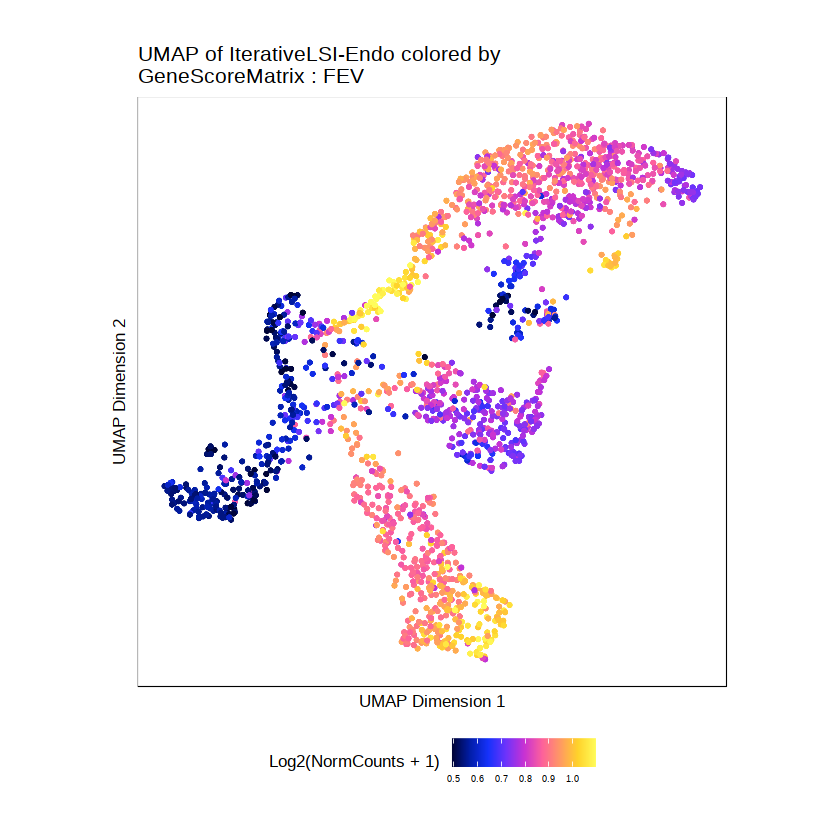

In [55]:
p$FEV

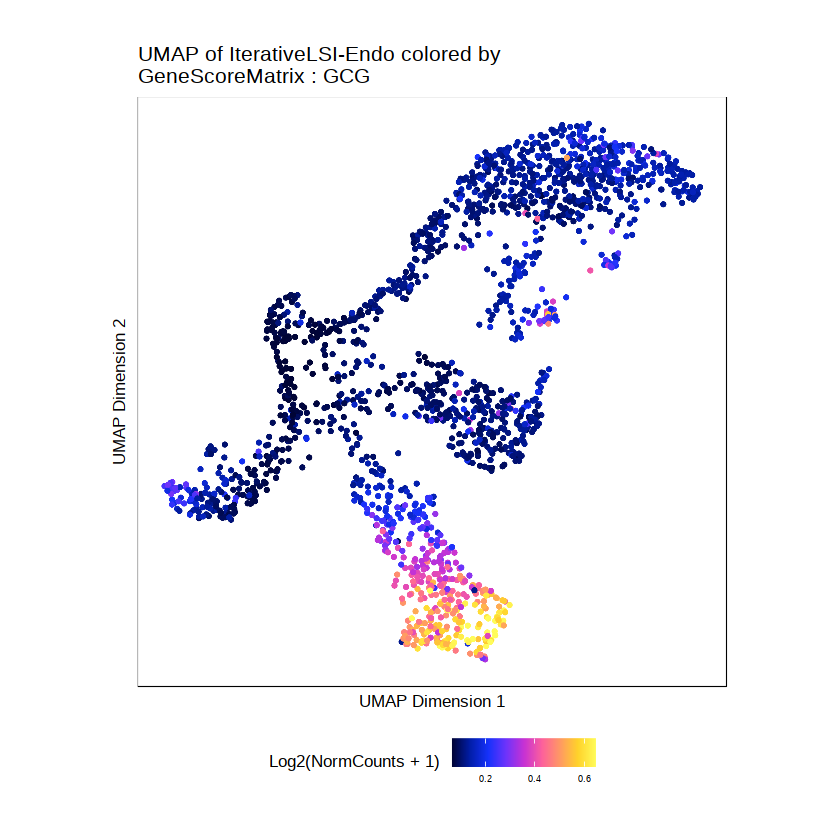

In [56]:
p$GCG

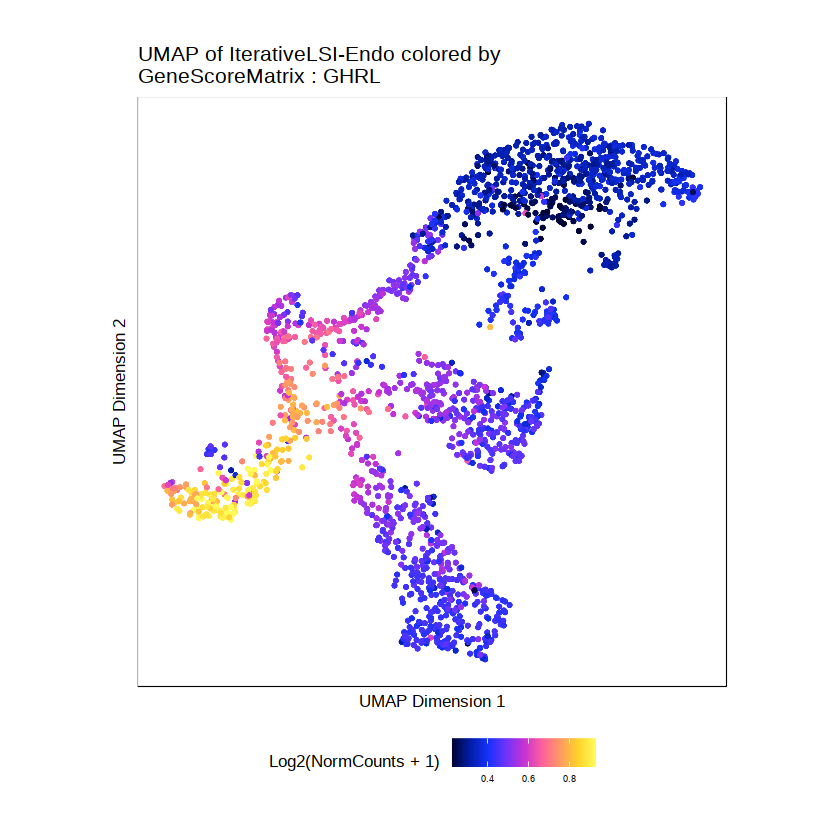

In [57]:
p$GHRL

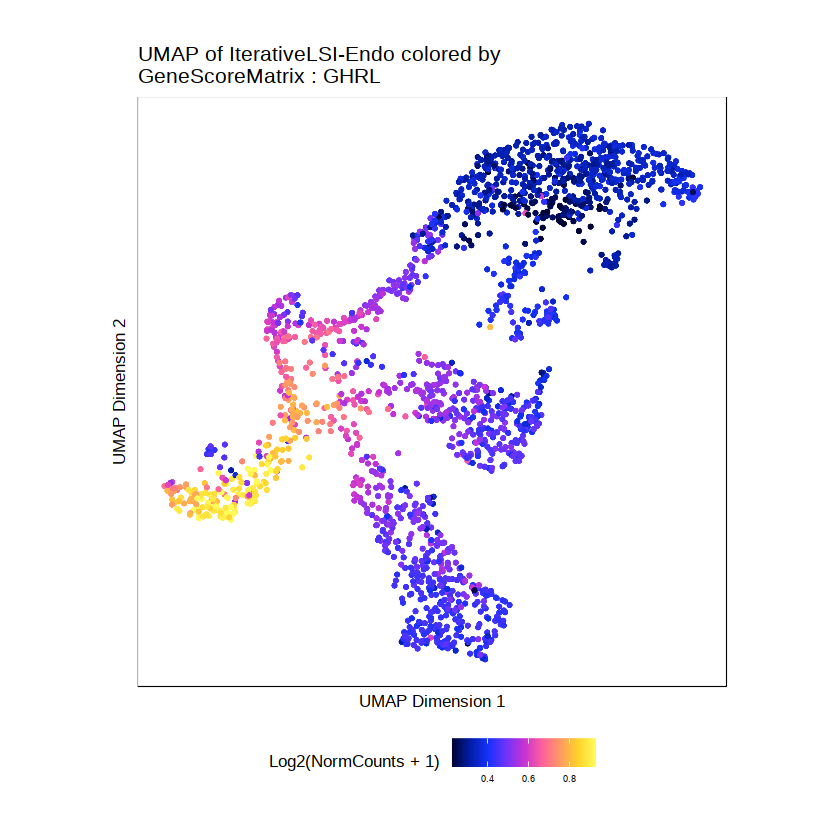

In [58]:
p$GHRL

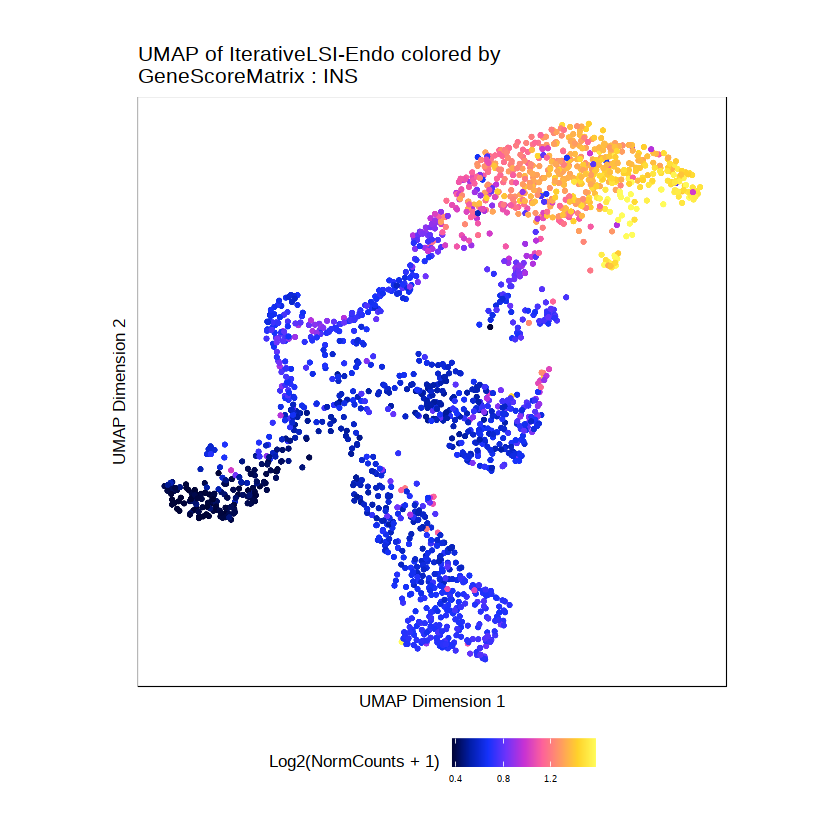

In [59]:
p$INS

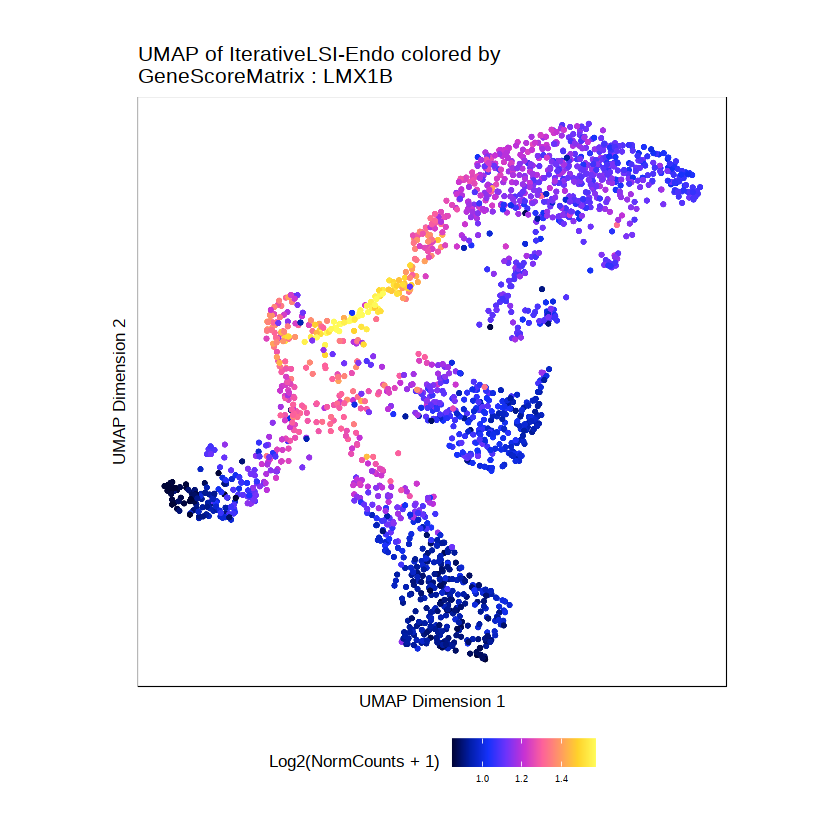

In [60]:
p$LMX1B

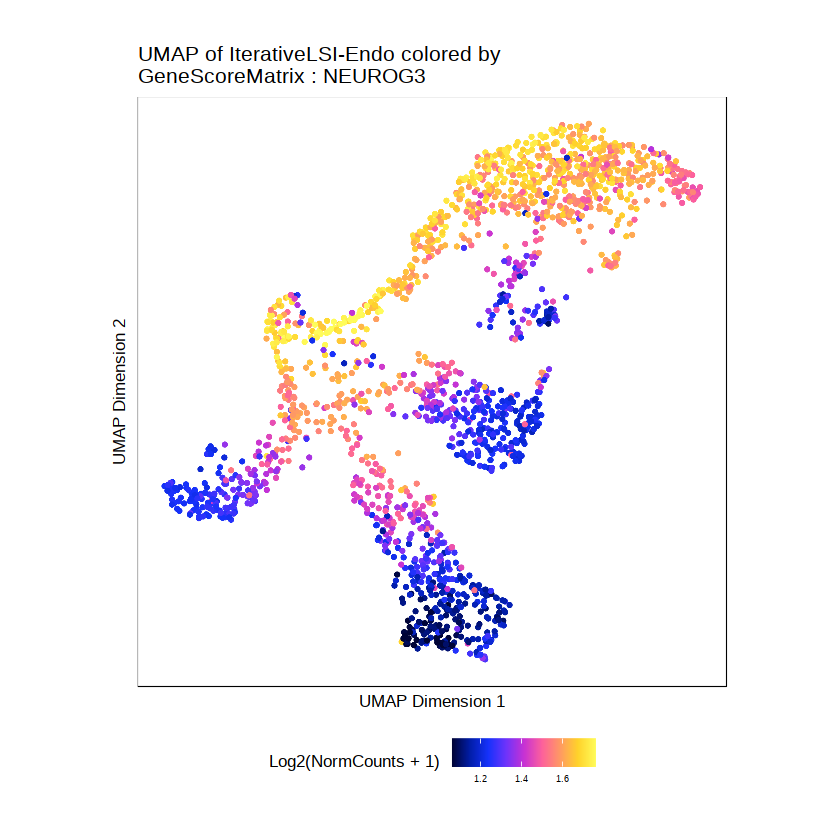

In [61]:
p$NEUROG3

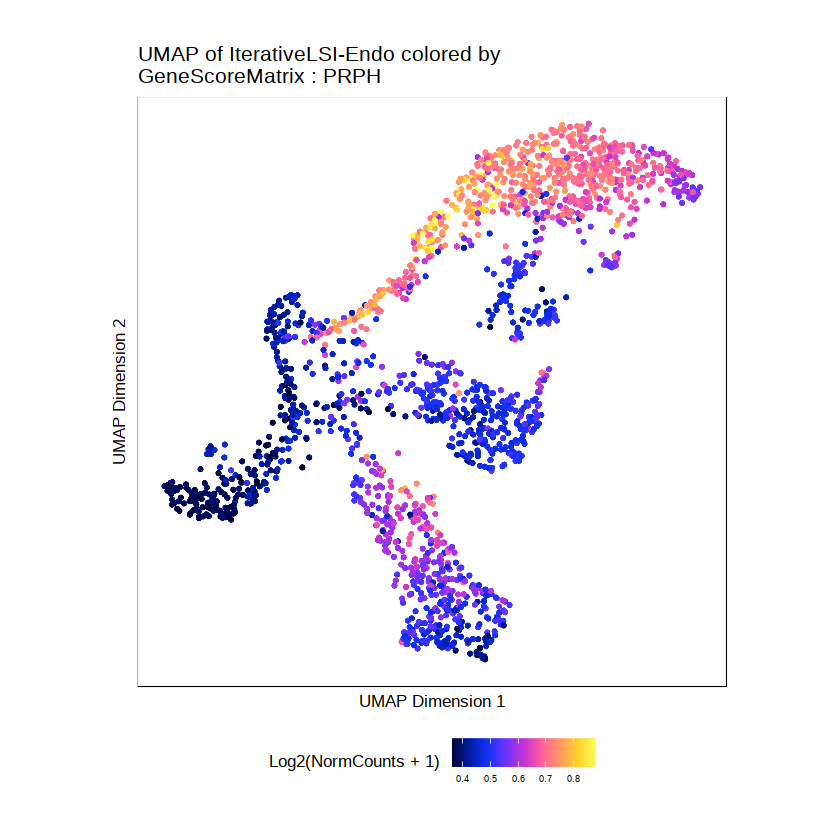

In [62]:
p$PRPH

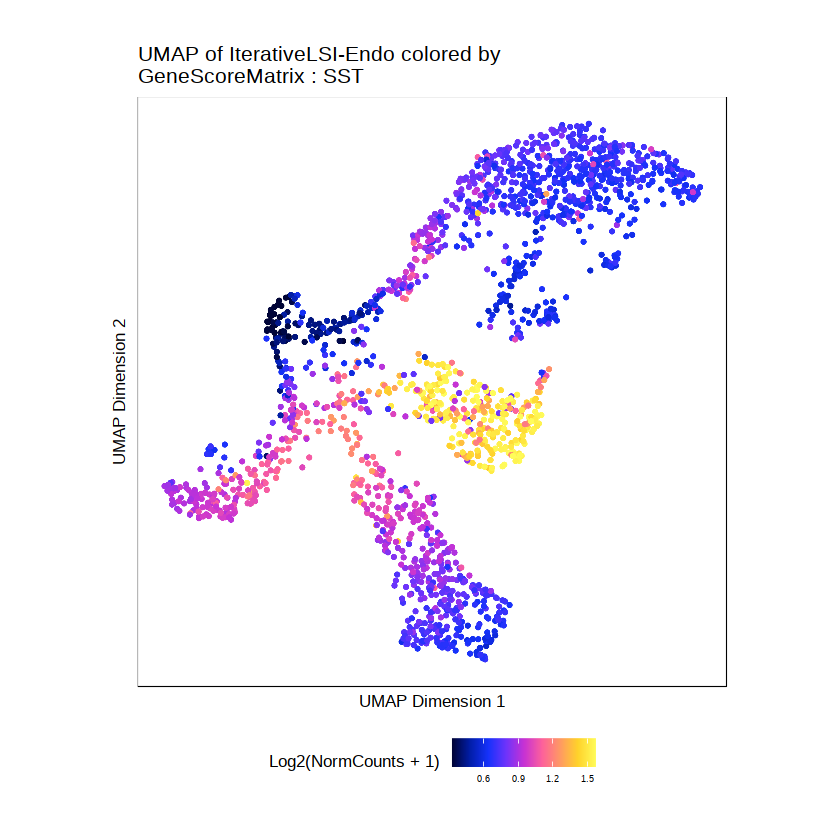

In [63]:
p$SST

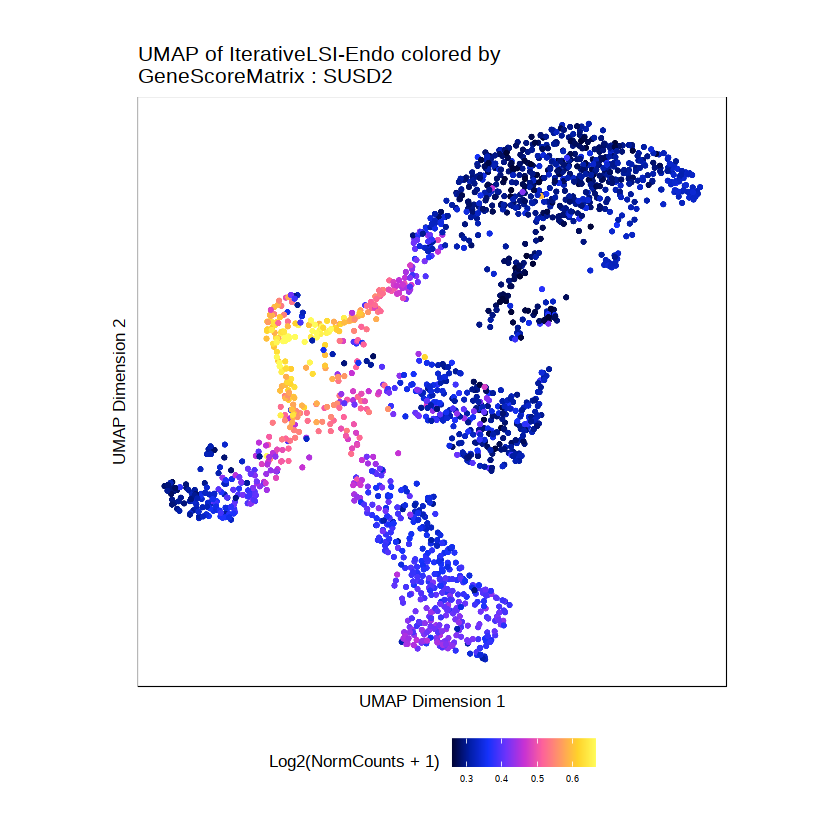

In [65]:
p$SUSD2

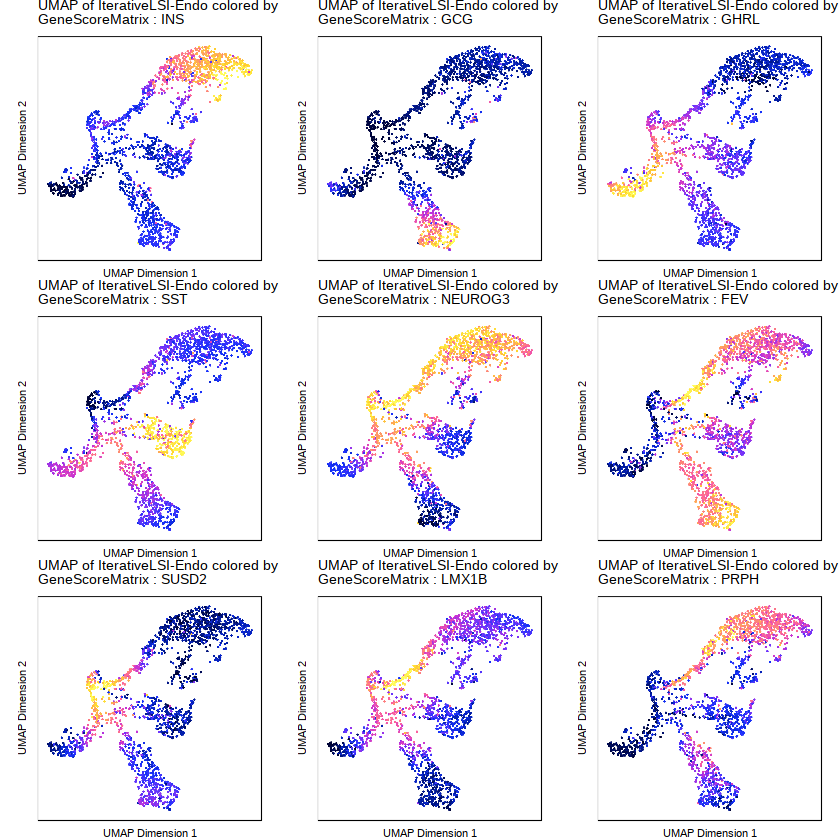

In [67]:
p2 <- lapply(p, function(x){
    x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(
        axis.text.x=element_blank(), 
        axis.ticks.x=element_blank(), 
        axis.text.y=element_blank(), 
        axis.ticks.y=element_blank()
    )
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

In [68]:
plotPDF(plotList = p, 
    name = "Plot-UMAP-Marker-Genes-W-Imputation.pdf", 
    ArchRProj = projEndo2, 
    addDOC = FALSE, width = 5, height = 5)

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!



In [69]:
trajGSM  <- getTrajectory(ArchRProj = projEndo2, name = "Beta", useMatrix = "GeneScoreMatrix", log2Norm = FALSE)
trajGIM  <- getTrajectory(ArchRProj = projEndo2, name = "Beta", useMatrix = "GIM-CellFindR", log2Norm = FALSE)


Creating Trajectory Group Matrix..

Smoothing...

Creating Trajectory Group Matrix..

Smoothing...



ERROR: Error in correlateTrajectories(trajGSM, trajGIM, corCutoff = -1): unused argument (corCutoff = -1)


In [84]:
corGSM_GIM <- correlateTrajectories(trajGSM, trajGIM, corCutOff=-1)

ArchR logging to : ArchRLogs/ArchR-correlateTrajectories-76084497e6c2-Date-2020-06-08_Time-13-30-36.log
If there is an issue, please report to github with logFile!

Found 1252 Correlated Pairings!

2020-06-08 13:32:23 : 



In [99]:
corGSM_GIM[,which(corGSM_GIM$allMappings$Correlation< -0.3)]

List of length 4
names(4): correlatedMappings allMappings seTrajectory1 seTrajectory2

In [126]:
anticorGSM_GIM<-corGSM_GIM

In [150]:
which(anticorGSM_GIM$correlatedMappings$Correlation < -0.3)

[1]   48  110  205  420  460  466  896  942 1054 1148 1229

In [191]:
anticorDF<-anticorGSM_GIM$correlatedMappings[which(anticorGSM_GIM$correlatedMappings$Correlation < -0.25),]

In [192]:
trajGSM2 <- trajGSM[anticorDF$name1,]
trajGIM2 <- trajGIM[anticorDF$name2,]

In [193]:
trajCombined <- trajGSM2

In [194]:
assay(trajCombined) <- t(apply(assay(trajGSM2), 1, scale)) + t(apply(assay(trajGIM2), 1, scale))

In [195]:
combinedMat <- plotTrajectoryHeatmap(trajCombined, returnMat = TRUE, varCutOff = 0)

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-76083b76ee8b-Date-2020-06-08_Time-13-55-04.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-76083b76ee8b-Date-2020-06-08_Time-13-55-04.log



In [196]:
rowOrder <- match(rownames(combinedMat), rownames(trajGSM2))

In [197]:
ht1 <- plotTrajectoryHeatmap(trajGSM2,  pal = paletteContinuous(set = "horizonExtra"),  varCutOff = 0, rowOrder = rowOrder)

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-760892c0fa1-Date-2020-06-08_Time-13-55-05.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-760892c0fa1-Date-2020-06-08_Time-13-55-05.log



In [198]:
ht2 <- plotTrajectoryHeatmap(trajGIM2, pal = paletteContinuous(set = "solarExtra"), varCutOff = 0, rowOrder = rowOrder)

ArchR logging to : ArchRLogs/ArchR-plotTrajectoryHeatmap-76085f38a7dc-Date-2020-06-08_Time-13-55-05.log
If there is an issue, please report to github with logFile!

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectoryHeatmap-76085f38a7dc-Date-2020-06-08_Time-13-55-05.log



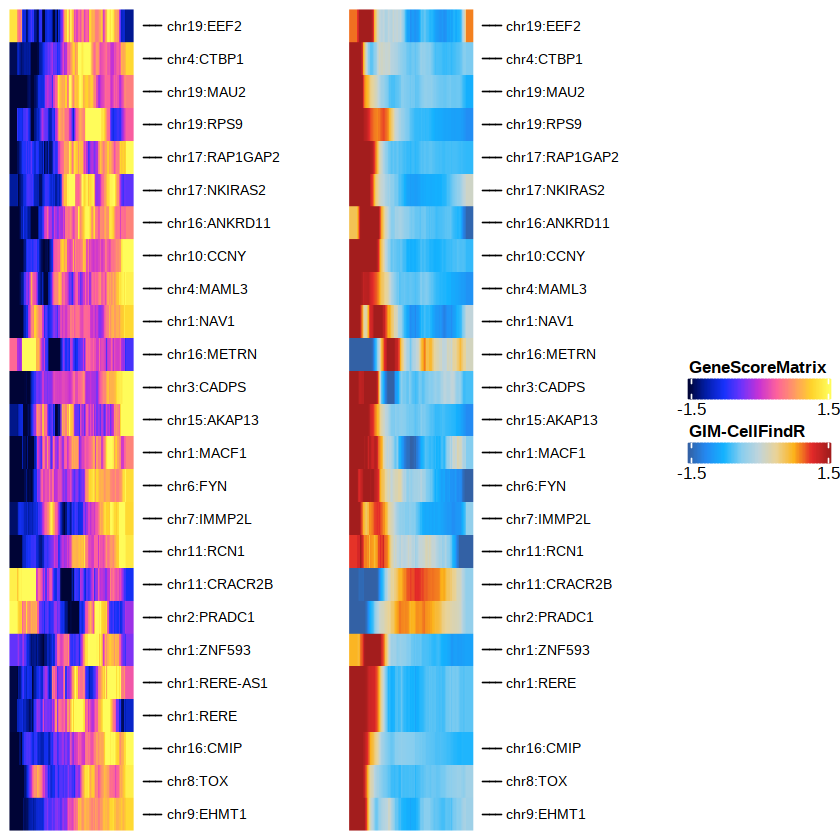

In [199]:
ht1 + ht2

In [200]:
t(apply(assay(trajGIM2), 1, scale))

[,1]       [,2]       [,3]       [,4]       [,5]      
chr1:RERE       2.3248639  2.3248639  2.3248639  2.3248639  2.3248639
chr1:RERE       2.3248639  2.3248639  2.3248639  2.3248639  2.3248639
chr1:ZNF593     0.7205398  0.7205398  0.7205398  0.7205398  0.7205398
chr1:MACF1      1.8174523  1.8174523  1.8174523  1.8174523  1.8174523
chr1:NAV1       1.7264830  1.7264830  1.7264830  1.7264830  1.7264830
chr10:CCNY      1.7946735  1.7946735  1.7946735  1.7946735  1.7946735
chr11:CRACR2B  -1.5147706 -1.5147706 -1.5147706 -1.5147706 -1.5147706
chr11:RCN1      1.1006711  1.1006711  1.1006711  1.1006711  1.1006711
chr15:AKAP13    2.2169923  2.2169923  2.2169923  2.2169923  2.2169923
chr16:METRN    -1.7721984 -1.7721984 -1.7721984 -1.7721984 -1.7721984
chr16:CMIP      2.7195016  2.7195016  2.7195016  2.7195016  2.7195016
chr16:ANKRD11   0.5740051  0.5740051  0.5740051  0.5740051  0.5740051
chr17:RAP1GAP2  1.9295209  1.9295209  1.9295209  1.9295209  1.9295209
chr17:NKIRAS2   1.9412153  1.9412153  1.9412153  1.9412153  1.9412153
chr19:EEF2      0.9311121  0.9311121  0.9311121  0.9311121  0.9311121
chr19:MAU2      2.9563642  2.9563642  2.9563642  2.9563642  2.9563642
chr19:RPS9      1.9347074  1.9347074  1.9347074  1.9347074  1.9347074
chr2:PRADC1    -2.5082756 -2.5082756 -2.5082756 -2.5082756 -2.5082756
chr3:CADPS      1.6297321  1.6297321  1.6297321  1.6297321  1.6297321
chr4:CTBP1      3.1342496  3.1342496  3.1342496  3.1342496  3.1342496
chr4:MAML3      2.2921773  2.2921773  2.2921773  2.2921773  2.2921773
chr6:FYN        1.6422650  1.6422650  1.6422650  1.6422650  1.6422650
chr7:IMMP2L     2.4856226  2.4856226  2.4856226  2.4856226  2.4856226
chr8:TOX        2.9104784  2.9104784  2.9104784  2.9104784  2.9104784
chr9:EHMT1      2.7354435  2.7354435  2.7354435  2.7354435  2.7354435
               [,6]       [,7]       [,8]       [,9]       [,10]      [,11]
chr1:RERE       2.3248639  2.2238165  2.1230224  1.9849915  1.8371553 ⋯    
chr1:RERE       2.3248639  2.2238165  2.1230224  1.9849915  1.8371553 ⋯    
chr1:ZNF593     0.7205398  0.6921985  0.6534380  0.7217339  0.9249141 ⋯    
chr1:MACF1      1.8174523  1.8115430  1.8664396  1.7773102  1.5571729 ⋯    
chr1:NAV1       1.7264830  1.6616696  1.6509055  1.5009108  1.2921878 ⋯    
chr10:CCNY      1.7946735  1.7829884  1.6860971  1.6213578  1.5913152 ⋯    
chr11:CRACR2B  -1.5147706 -1.5082460 -1.4512485 -1.4071718 -1.4250632 ⋯    
chr11:RCN1      1.1006711  1.1967064  1.2098364  1.2039806  1.4945000 ⋯    
chr15:AKAP13    2.2169923  2.1564637  2.0531872  1.9721292  1.9013783 ⋯    
chr16:METRN    -1.7721984 -1.7439212 -1.7194172 -1.7266214 -1.6780785 ⋯    
chr16:CMIP      2.7195016  2.5781154  2.3789466  2.1359989  1.9129654 ⋯    
chr16:ANKRD11   0.5740051  0.7134051  0.8970521  1.1520203  1.4815907 ⋯    
chr17:RAP1GAP2  1.9295209  1.9509266  1.9027267  1.9352918  2.0028219 ⋯    
chr17:NKIRAS2   1.9412153  1.9644400  1.9640007  1.9634316  2.0081747 ⋯    
chr19:EEF2      0.9311121  1.1156789  1.2345218  1.5011408  1.9383850 ⋯    
chr19:MAU2      2.9563642  2.7596820  2.4992606  2.2343326  1.9344014 ⋯    
chr19:RPS9      1.9347074  1.8749907  1.8277242  1.7454518  1.6408239 ⋯    
chr2:PRADC1    -2.5082756 -2.3958477 -2.2562640 -2.0724441 -1.9261739 ⋯    
chr3:CADPS      1.6297321  1.6048180  1.4442182  1.3481816  1.3344691 ⋯    
chr4:CTBP1      3.1342496  2.9172391  2.5416767  2.1307706  1.7409651 ⋯    
chr4:MAML3      2.2921773  2.1461539  1.9995734  1.7962490  1.6018935 ⋯    
chr6:FYN        1.6422650  1.4697364  1.2417360  1.1828065  1.2554138 ⋯    
chr7:IMMP2L     2.4856226  2.1976843  1.9146792  1.5797392  1.3349410 ⋯    
chr8:TOX        2.9104784  2.7172279  2.4602632  2.1829839  2.0796824 ⋯    
chr9:EHMT1      2.7354435  2.6817080  2.5197417  2.3293433  2.1710554 ⋯    
               [,12]       [,13]       [,14]        [,15]       [,16]       
chr1:RERE      -0.52724393 -0.52128012 -0.550064419 -0.50383991 -0.513342998
chr1:RERE      -0.52724393 -0.52128012 -0.550064419 -0.50383991 -